In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split

In [6]:
# import data_feeder
# df = data_feeder._load_data()
def convert_to_float(x):
    if x == '':
        return np.nan
    val = float(str(x).replace(',','.'))
    return val
column_converters = {
    'Temperature (°C)': convert_to_float,
    'Drew point (°C)': convert_to_float,
    'Visibility (km)': convert_to_float,
    'Pressure at the station (kPa)': convert_to_float
}
dtype_mapping = {
    'Station Code': 'category',
    'Weather': 'category',
    'wind direction (10s deg)': float
}
def get_data(train=True, base_path=''):
    return pd.read_csv(Path('{}/{}.csv'.format(base_path, 'training' if train else 'test')), converters=column_converters, parse_dates=['Date/Hour'], dtype=dtype_mapping)
raw_df = get_data(train=True, base_path=Path('bike-sharing-system'))
from data_loader import WeatherDataImputer
weather_imputer = WeatherDataImputer()
df = weather_imputer.fit_transform(raw_df)

In [7]:
df.head()

Date/Hour  Temperature (°C)  Drew point (°C)  \
0 2015-06-29 11:00:00              17.6             11.5   
1 2015-07-14 00:00:00              22.5             20.1   
2 2015-09-30 16:00:00              12.1              3.1   
3 2015-06-06 14:00:00              18.5              0.7   
4 2016-06-10 04:00:00               8.9              4.9   

   Relativite humidity (%)  wind direction (10s deg)  Wind speed (km/h)  \
0                     67.0                      31.0               13.0   
1                     86.0                      17.0               10.0   
2                     54.0                       1.0               34.0   
3                     30.0                      30.0               12.0   
4                     76.0                      29.0                9.0   

   Visibility (km)  Visility indicator  Pressure at the station (kPa)  hmdx  \
0             24.1                 NaN                         100.53   NaN   
1             24.1                 NaN                         100.15  30.0   
2             24.1                 NaN                         101.59   NaN   
3             48.3                 NaN                         101.54   NaN   
4             24.1                 NaN                         100.93   NaN   

   Wind Chill               Weather  Public Holiday Station Code  Withdrawals  \
0         NaN                    ND               0         6178            3   
1         NaN                    ND               0         6921            1   
2         NaN               Nuageux               0         6219            0   
3         NaN                    ND               0         6196           11   
4         NaN  Généralement nuageux               0         6087            0   

   Volume  
0       0  
1       0  
2       0  
3       1  
4       0

In [8]:
sdf = df.set_index(['Station Code', 'Date/Hour']).sort_index()

In [9]:
sdf.head()

Temperature (°C)  Drew point (°C)  \
Station Code Date/Hour                                                
10002        2015-04-15 00:00:00               6.7             -1.5   
             2015-04-15 01:00:00               6.0             -1.9   
             2015-04-15 02:00:00               5.7             -1.7   
             2015-04-15 03:00:00               5.2             -4.4   
             2015-04-15 04:00:00               3.0             -4.5   

                                  Relativite humidity (%)  \
Station Code Date/Hour                                      
10002        2015-04-15 00:00:00                     56.0   
             2015-04-15 01:00:00                     57.0   
             2015-04-15 02:00:00                     59.0   
             2015-04-15 03:00:00                     50.0   
             2015-04-15 04:00:00                     58.0   

                                  wind direction (10s deg)  Wind speed (km/h)  \
Station Code Date/Hour                                                          
10002        2015-04-15 00:00:00                      26.0               14.0   
             2015-04-15 01:00:00                      27.0                9.0   
             2015-04-15 02:00:00                      36.0                2.0   
             2015-04-15 03:00:00                      33.0               11.0   
             2015-04-15 04:00:00                      27.0                6.0   

                                  Visibility (km)  Visility indicator  \
Station Code Date/Hour                                                  
10002        2015-04-15 00:00:00             24.1                 NaN   
             2015-04-15 01:00:00             24.1                 NaN   
             2015-04-15 02:00:00             24.1                 NaN   
             2015-04-15 03:00:00             24.1                 NaN   
             2015-04-15 04:00:00             24.1                 NaN   

                                  Pressure at the station (kPa)  hmdx  \
Station Code Date/Hour                                                  
10002        2015-04-15 00:00:00                         101.46   NaN   
             2015-04-15 01:00:00                         101.47   NaN   
             2015-04-15 02:00:00                         101.50   NaN   
             2015-04-15 03:00:00                         101.56   NaN   
             2015-04-15 04:00:00                         101.62   NaN   

                                  Wind Chill Weather  Public Holiday  \
Station Code Date/Hour                                                 
10002        2015-04-15 00:00:00         NaN      ND               0   
             2015-04-15 01:00:00         NaN  Dégagé               0   
             2015-04-15 02:00:00         NaN      ND               0   
             2015-04-15 03:00:00         NaN      ND               0   
             2015-04-15 04:00:00         NaN  Dégagé               0   

                                  Withdrawals  Volume  
Station Code Date/Hour                                 
10002        2015-04-15 00:00:00            0       0  
             2015-04-15 01:00:00            0       0  
             2015-04-15 02:00:00            0       0  
             2015-04-15 03:00:00            0       0  
             2015-04-15 04:00:00            0       0

In [10]:
sdf.nunique()

Temperature (°C)                 357
Drew point (°C)                  371
Relativite humidity (%)           88
wind direction (10s deg)          37
Wind speed (km/h)                 51
Visibility (km)                   22
Visility indicator                 0
Pressure at the station (kPa)    434
hmdx                              19
Wind Chill                         9
Weather                           33
Public Holiday                     2
Withdrawals                       83
Volume                             2
dtype: int64

In [11]:
gp = df.groupby(['Station Code', 'Date/Hour'])

In [12]:
df.groupby('Station Code').count()

Date/Hour  Temperature (°C)  Drew point (°C)  \
Station Code                                                 
10002              8497              8497             8497   
6008               8497              8497             8497   
6009               8497              8497             8497   
6012               8497              8497             8497   
6015               8497              8497             8497   
6019               8497              8497             8497   
6021               8497              8497             8497   
6022               8497              8497             8497   
6023               8497              8497             8497   
6025               8497              8497             8497   
6026               8497              8497             8497   
6027               8497              8497             8497   
6031               8497              8497             8497   
6032               8497              8497             8497   
6034               8497              8497             8497   
6036               8497              8497             8497   
6038               8497              8497             8497   
6039               8497              8497             8497   
6040               8497              8497             8497   
6041               8497              8497             8497   
6042               8497              8497             8497   
6043               8497              8497             8497   
6044               8497              8497             8497   
6046               8497              8497             8497   
6047               8497              8497             8497   
6048               8497              8497             8497   
6049               8497              8497             8497   
6050               8497              8497             8497   
6052               8497              8497             8497   
6053               8497              8497             8497   
...                 ...               ...              ...   
6315               8497              8497             8497   
6334               8497              8497             8497   
6344               8497              8497             8497   
6371               8497              8497             8497   
6385               8497              8497             8497   
6387               8497              8497             8497   
6395               8497              8497             8497   
6396               8497              8497             8497   
6406               8497              8497             8497   
6411               8497              8497             8497   
6413               8497              8497             8497   
6418               8497              8497             8497   
6424               8497              8497             8497   
6432               8497              8497             8497   
6434               8497              8497             8497   
6501               8497              8497             8497   
6724               8497              8497             8497   
6727               8497              8497             8497   
6729               8497              8497             8497   
6748               8497              8497             8497   
6750               8497              8497             8497   
6752               8497              8497             8497   
6903               8497              8497             8497   
6906               8497              8497             8497   
6907               8497              8497             8497   
6910               8497              8497             8497   
6912               8497              8497             8497   
6921               8497              8497             8497   
6927               8497              8497             8497   
6928               8497              8497             8497   

              Relativite humidity (%)  wind direction (10s deg)  \
Station Code                            

In [13]:
sdf.index.levshape

(182, 8497)

In [14]:
stations = sdf.index.levels[0].tolist()

In [15]:
import math
math.ceil(len(stations)/2.)

91

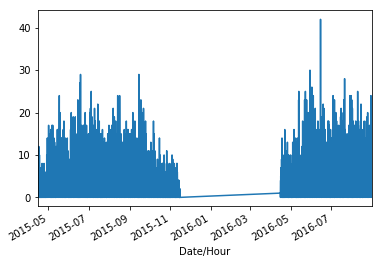

In [21]:
idx = pd.IndexSlice
# sdf.loc[idx['10002', ('Withdrawals')]].plot()
sdf.loc[idx[stations[2], ('Withdrawals')]].plot()

In [24]:
import math
import matplotlib.pyplot as plt

In [14]:
nrows = math.ceil(len(stations)/2.)
# fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(60,182), dpi=160)
plt.subplots_adjust(top=0.9)
if False:
    for i, station in enumerate(stations):
        x, y = i // 2, i % 2
        sdf.loc[station, ('Withdrawals')].plot(ax=axes[x, y])
        axes[x,y].set_title(station)

<Figure size 432x288 with 0 Axes>

In [ ]:
fig.savefig('test.png', dpi=60)

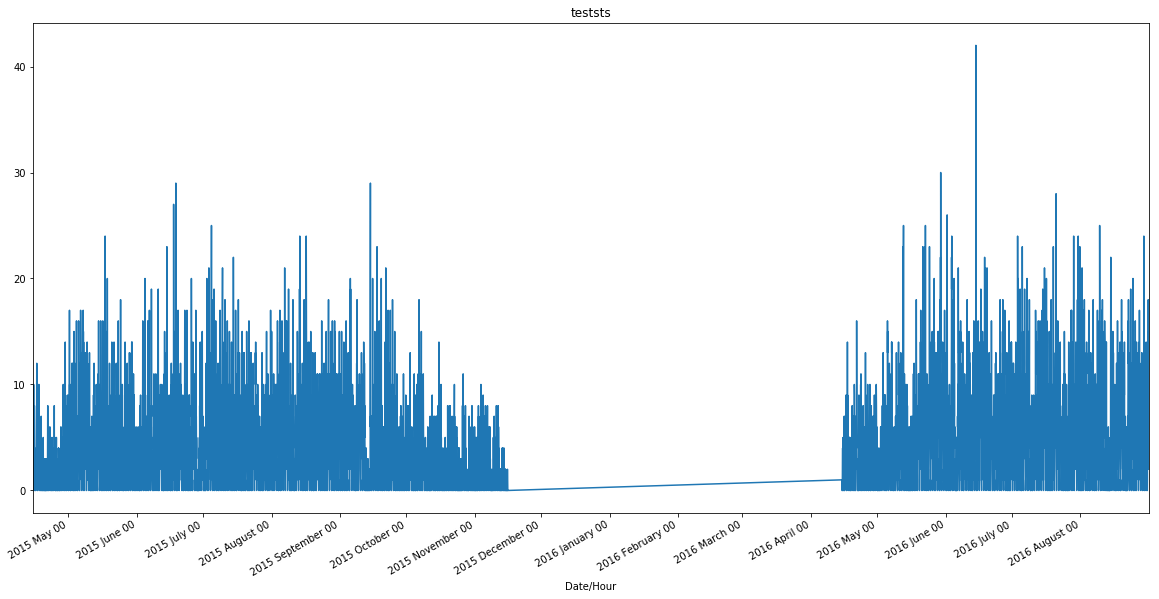

In [25]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(1)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%B-%d %H')
ax.set_title('teststs')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %B %H'))
sdf.loc[idx[stations[2], ('Withdrawals')]].plot(figsize=(20,10), ax=ax)

In [50]:
fig, ax = plt.subplots(1)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%B-%d %H')
ax.set_title('teststs')
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
b_i = 24*30*9 + 24*3
e_i = b_i + 24*7
sdf.loc[idx[(stations[2]), ('Withdrawals')]].iloc[b_i:e_i].plot(figsize=(20,10), ax=ax)

In [ ]:
sdf.loc[idx[('6184')]].iloc[24*30*8:30*24*8+24*4]

In [ ]:
(sdf.loc[idx[('6184'), ('Pressure at the station (kPa)')]] - sdf.loc[idx[('6184'), ('Pressure at the station (kPa)')]].mean() )/sdf.loc[idx[('6184'), ('Pressure at the station (kPa)')]].std()

In [ ]:
ir = pd.interval_range(start=pd.Timestamp('2015-04-15'), end=pd.Timestamp('2015-11-15'), freq='H')
print(ir)

In [ ]:
sdf.loc[idx[('10002'), ('Withdrawals')]].index[0].month

In [ ]:
fig, ax = plt.subplots(1)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%B-%d %H')
ax.set_title('teststs')

ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d%H'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %B %H'))
sdf.loc[idx[('10002'), ('Withdrawals')]].loc['2016-06-01':'2016-06-03'].plot()